# Download the data

In [1]:

import os 
import tarfile
import urllib

In [2]:
Download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
Housing_path = os.path.join("datasets", "housing")
Housing_url = Download_root + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = Housing_url, housing_path = Housing_path):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path = Housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

raw_data = load_housing_data()

# Check and read through the data

In [6]:
check_data = raw_data.copy()

In [7]:
### check the information of each column
check_data.info()
### since ocean_proximity contain object- data, I use value_counts to check the amount of number of each category. (dataframe.unique can return the specific object in the data)
check_data['ocean_proximity'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
check_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


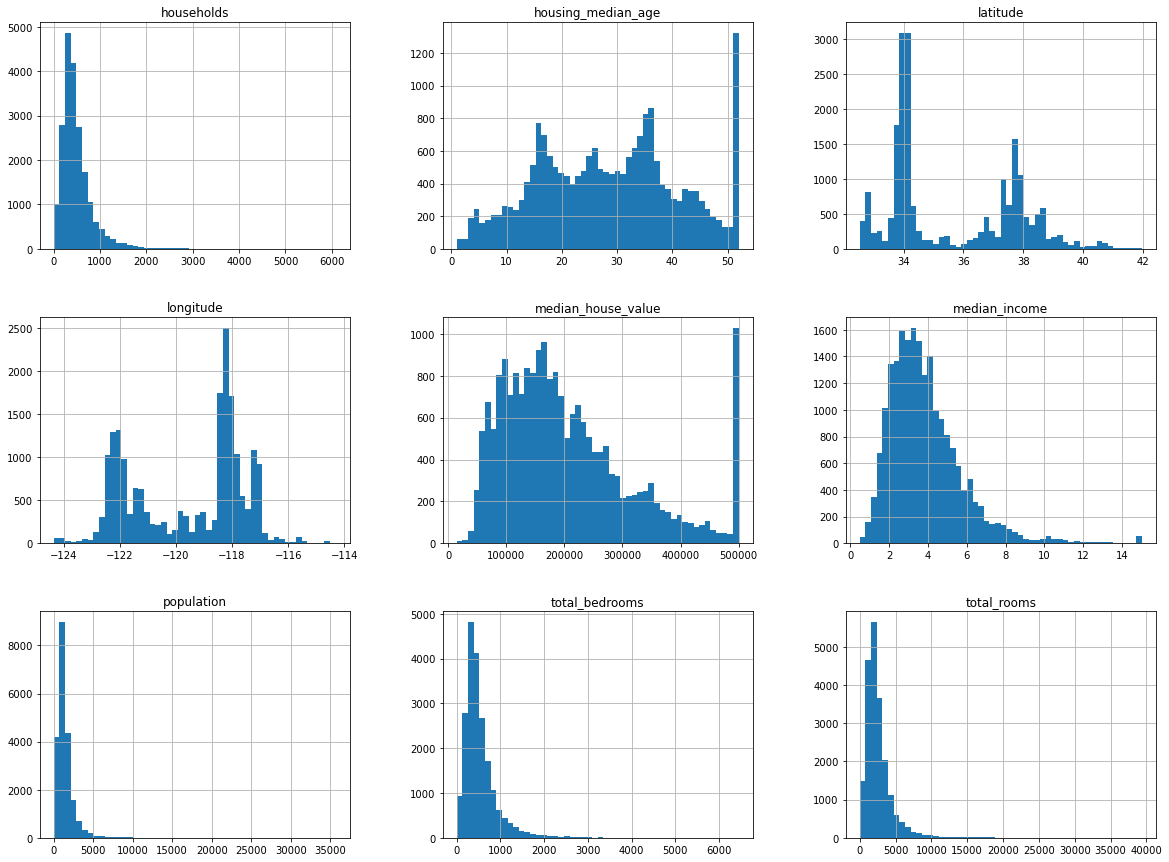

In [9]:
### plot in histogram to show the distribution of the data
import matplotlib.pyplot as plt
check_data.hist(bins = 50, figsize = (20, 15))
plt.show()

# Visualize the data

In [10]:

visualization_data = raw_data.copy()

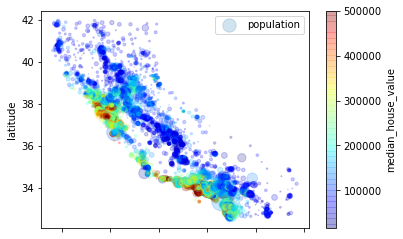

In [11]:
### scatter plot

visualization_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2,
                       s = visualization_data["population"]/100, label = 'population', c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True) ### utilize alpha command to present difference of area according to density

In [12]:
### correlation
correlation_data = visualization_data.corr()
correlation_data['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [30]:
visualization_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_num', StandardScaler())
])


In [15]:
processing_data = visualization_data.drop(['median_house_value'], axis = 1)

num_data = processing_data.drop(["ocean_proximity"], axis = 1)
num_attri = list(num_data)
cat_ob = ["ocean_proximity"]

full_piplines = ColumnTransformer([
    ('num', num_pipline, num_attri),
    ('cat', OneHotEncoder(), cat_ob),
    
    
], remainder = 'drop')  ### drop is default, another option is passthrough

In [16]:
preprocessing_data = full_piplines.fit_transform(visualization_data)

In [17]:
preprocessing_dataframe = pd.DataFrame(preprocessing_data)

In [18]:
preprocessing_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,0.0,1.0,0.0,0.0,0.0


In [19]:
preprocessing_dataframe_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [20]:
preprocessing_dataframe.columns = preprocessing_dataframe_columns

In [21]:
preprocessing_dataframe['median_house_value'] = visualization_data['median_house_value']

# Split and shuffle the data

In [22]:
from sklearn.model_selection import train_test_split
split_shuffle_data = preprocessing_dataframe.copy()

In [23]:
train_set, test_set = train_test_split(split_shuffle_data, test_size = 0.2, random_state = 42)

In [24]:
housing_train_inputs = train_set.drop(['median_house_value'], axis = 1)
housing_train_targets = train_set['median_house_value']

housing_test_inputs = test_set.drop(['median_house_value'], axis = 1)
housing_test_targets = test_set['median_house_value']

# Training and evaluation

### Linear Regression

In [25]:
### linear regression
from sklearn.linear_model import LinearRegression

In [26]:
lin_model = LinearRegression()
lin_model.fit(housing_train_inputs, housing_train_targets)

LinearRegression()

In [27]:
lin_model.predict(housing_train_inputs)

array([188628.0772436 , 290379.8948687 , 250985.48476349, ...,
       194624.05524513, 281818.52422052, 271572.84185839])

In [28]:
### check the root mean squar error to check whether or not the overfitting or underfitting
import numpy as np
housing_prediction = lin_model.predict(housing_train_inputs)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_train_targets, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  ### large RMSE means large error compare prediction to target, so underfitting occur

68433.93736666226

In [29]:
## Evaluation with cross-validation
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_model, housing_train_inputs, housing_train_targets, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-lin_scores)
lin_rmse_score

array([65581.45520649, 71711.35784404, 68143.02388491, 66855.55244479,
       69440.38017435, 65640.36503235, 65861.37192245, 69898.33048393,
       73117.94692191, 69704.17693297])

### Grid Search

In [30]:
### we do grid search to find out the optimal parameter
from sklearn.model_selection import GridSearchCV
para_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, ]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [32]:
grid_search = GridSearchCV(forest_reg, para_grid, cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

In [33]:
grid_search.fit(housing_train_inputs, housing_train_targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [35]:
feature_importance = grid_search.best_estimator_.feature_importances_
pd.DataFrame(feature_importance, columns = ['importance'], index =  housing_train_inputs.columns)

,importance
longitude,0.107989
latitude,0.096729
housing_median_age,0.050854
total_rooms,0.028443
total_bedrooms,0.027308
population,0.037722
households,0.023578
median_income,0.454534
<1H OCEAN,0.007513
INLAND,0.156732


# Evaluation

In [36]:
housing_test_inputs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20046,0.279366,0.200449,-0.289187,-0.518327,-0.242831,-0.029562,-0.367597,-1.152489,0.0,1.0,0.0,0.0,0.0
3024,0.054757,-0.230283,0.108104,0.140833,-0.242831,0.123206,0.220915,-0.705015,0.0,1.0,0.0,0.0,0.0
15663,-1.432653,1.015093,1.856182,0.547423,-0.242831,-0.101972,1.212230,-0.205588,0.0,0.0,0.0,1.0,0.0
20484,0.424114,-0.632923,-0.924851,0.190339,-0.242831,0.246834,-0.011874,0.982710,1.0,0.0,0.0,0.0,0.0
9814,-1.178096,0.462633,0.425936,-0.130532,-0.242831,-0.320086,-0.187120,-0.076678,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,1.172810,-1.063655,-1.004309,0.242595,-0.130761,-0.065767,-0.124345,0.386535,1.0,0.0,0.0,0.0,0.0
16623,-0.629052,-0.127282,-0.050812,0.773408,0.832562,0.198266,0.537403,-0.602214,0.0,0.0,0.0,0.0,1.0
18086,-1.237992,0.785682,-0.289187,0.676230,0.002769,0.140868,0.179065,2.820927,1.0,0.0,0.0,0.0,0.0
2144,-0.094982,0.532861,0.584852,-0.059023,-0.168913,-0.175266,-0.066802,-0.571473,0.0,1.0,0.0,0.0,0.0


In [37]:
housing_test_targets

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

In [38]:
final_model = grid_search.best_estimator_

In [39]:
final_predict = final_model.predict(housing_test_inputs)

In [41]:
final_mse = mean_squared_errors = (housing_test_targets, final_predict ) 
final_rmse = np.sqrt(final_mse)
final_rmse

array([[218.40329668, 214.00934559, 707.10748829, ..., 707.10748829,
        268.88659319, 389.23000912],
       [223.62170437, 273.48369848, 679.10752708, ..., 706.16636378,
        266.80204897, 414.79713917]])

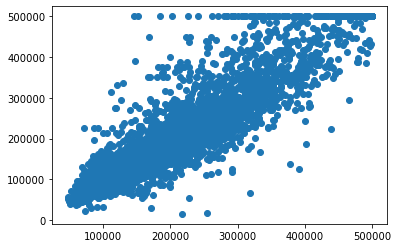

In [43]:
plt.scatter(final_predict, housing_test_targets)